In [1]:
%matplotlib inline
import tensorflow as tf
from my_tf_layer import *
from PIL import Image
import numpy as np

from time import gmtime,strftime


seed = 15  # random seed
random.seed(seed)

nchannel = 1
crop_size = 512
batch = 1

data = tf.placeholder(tf.float32, [batch, crop_size,crop_size,nchannel])
label =  tf.placeholder(tf.int32, [1, crop_size,crop_size])
expected = tf.expand_dims(label, -1)
device = '/gpu:0'

out_size = 64
conv1_1 = conv2d_layer(data,3,out_size,name = 'conv1_1')
conv1_1 = batch_norm_layer(conv1_1,name = 'conv1_1_bn')

out_size = 64
conv1_2 = conv2d_layer(conv1_1,3,out_size,name = 'conv1_2')
conv1_2 = batch_norm_layer(conv1_2,name = 'conv1_2_bn')

out_size = 128
conv1_3 = conv2d_layer(conv1_2,3,out_size,name = 'conv1_3')
conv1_3 = batch_norm_layer(conv1_2,name = 'conv1_3_bn')

# pool1
pool1 = pool_layer(conv1_3,name='pool1')

out_size = 64
conv2_1 = conv2d_layer(pool1,3,out_size,name = 'conv2_1')
conv2_1 = batch_norm_layer(conv2_1,name = 'conv2_1_bn')

out_size = 128
conv2_2 = conv2d_layer(conv2_1,3,out_size,name = 'conv2_2')
conv2_2 = batch_norm_layer(conv2_2,name = 'conv2_2_bn')

out_size = 128
conv2_3 = conv2d_layer(conv2_2,3,out_size,name = 'conv2_3')
conv2_3 = batch_norm_layer(conv2_3,name = 'conv2_3_bn')

pool2 = pool_layer(conv2_3,name='pool2')

out_size = 64
conv3_1 = conv2d_layer(pool2,3,out_size,name = 'conv3_1')
conv3_1 = batch_norm_layer(conv3_1,name = 'conv3_1_bn')

out_size = 128
conv3_2 = conv2d_layer(conv3_1,3,out_size,name = 'conv3_2')
conv3_2 = batch_norm_layer(conv3_2,name = 'conv3_2_bn')

out_size = 128
conv3_3 = conv2d_layer(conv3_2,3,out_size,name = 'conv3_3')
conv3_3 = batch_norm_layer(conv3_3,name = 'conv3_3_bn')

# un pooling layer
un_pool2 = up_pool_deconv_layer(conv3_3,2,name = 'unpool2')

out_size = 64
conv4_1 = conv2d_layer(un_pool2,3,out_size,name = 'conv4_1')
conv4_1 = batch_norm_layer(conv4_1,name = 'conv4_1_bn')

out_size = 128
conv4_2 = conv2d_layer(conv4_1,3,out_size,name = 'conv4_2')
conv4_2 = batch_norm_layer(conv4_2,name = 'conv4_2_bn')

out_size = 128
conv4_3 = conv2d_layer(conv4_2,3,out_size,name = 'conv4_3')
conv4_3 = batch_norm_layer(conv4_3,name = 'conv4_3_bn')

un_pool1 = up_pool_deconv_layer(conv4_3,2,name='unpool1')

out_size = 64
conv5_1 = conv2d_layer(un_pool1,3,out_size,name = 'conv5_1')
conv5_1 = batch_norm_layer(conv5_1,name = 'conv5_1_bn')

out_size = 128
conv5_2 = conv2d_layer(conv5_1,3,out_size,name = 'conv5_2')
conv5_2 = batch_norm_layer(conv5_2,name = 'conv5_2_bn')

out_size = 128
conv5_3 = conv2d_layer(conv5_2,3,out_size,name = 'conv5_3')
conv5_3 = batch_norm_layer(conv5_3,name = 'conv5_3_bn')

out_size = 64
conv5_4 = conv2d_layer(conv5_3,3,out_size,name = 'conv5_4')
conv5_4 = batch_norm_layer(conv5_4,name = 'conv5_4_bn')

classes = 2
score = conv2d_layer(conv5_4,1,classes,name='score')

logits = tf.reshape(score,(-1,2))
print 'loghts size: ',logits.get_shape()


cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, tf.reshape(expected, [-1]), name='x_entropy')
print 'cross entropy size: ',cross_entropy.get_shape()
loss = tf.reduce_mean(cross_entropy)

rate = 0.0001
optimize = tf.train.AdamOptimizer(rate,0.5).minimize(loss)
#optimize = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
th = 0.5
prediction = tf.argmax(tf.reshape(tf.nn.softmax(logits), tf.shape(score)), dimension=3,name='prediction')
print 'prediction size: ',prediction.get_shape()
accuracy = tf.reduce_sum(tf.equal(tf.cast(prediction,tf.int32),label))

layer: conv1_1  size: (1, 512, 512, 64)
layer: conv1_2  size: (1, 512, 512, 64)
layer: conv1_3  size: (1, 512, 512, 128)
layer: pool1  size: (1, 256, 256, 64)
layer: conv2_1  size: (1, 256, 256, 64)
layer: conv2_2  size: (1, 256, 256, 128)
layer: conv2_3  size: (1, 256, 256, 128)
layer: pool2  size: (1, 128, 128, 128)
layer: conv3_1  size: (1, 128, 128, 64)
layer: conv3_2  size: (1, 128, 128, 128)
layer: conv3_3  size: (1, 128, 128, 128)
layer: unpool2  size: (1, 256, 256, 128)
layer: conv4_1  size: (1, 256, 256, 64)
layer: conv4_2  size: (1, 256, 256, 128)
layer: conv4_3  size: (1, 256, 256, 128)
layer: unpool1  size: (1, 512, 512, 128)
layer: conv5_1  size: (1, 512, 512, 64)
layer: conv5_2  size: (1, 512, 512, 128)
layer: conv5_3  size: (1, 512, 512, 128)
layer: conv5_4  size: (1, 512, 512, 64)
layer: score  size: (1, 512, 512, 2)
loghts size:  (262144, 2)
cross entropy size:  (262144,)
prediction size:  (1, 512, 512)


In [2]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, "checkpoint/10-17-20.ckpt")
#tf.trainable_variables()

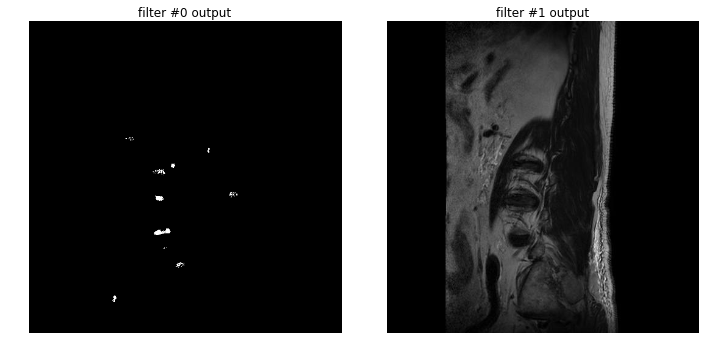

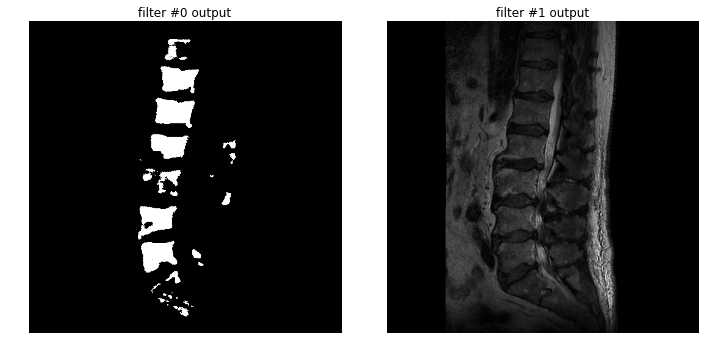

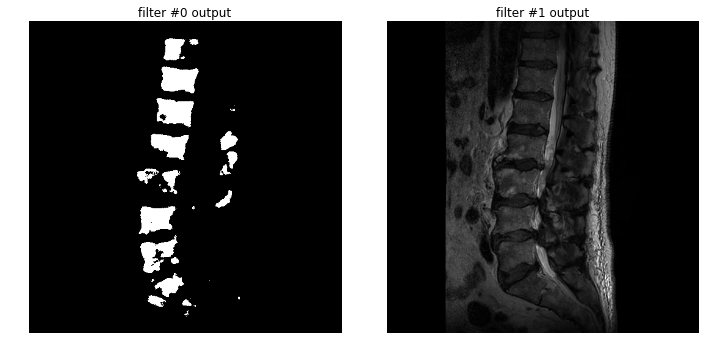

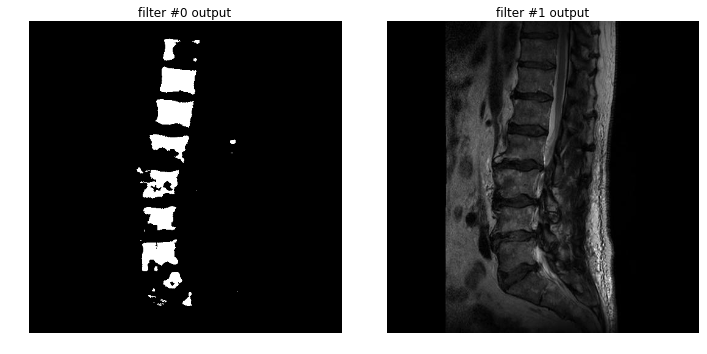

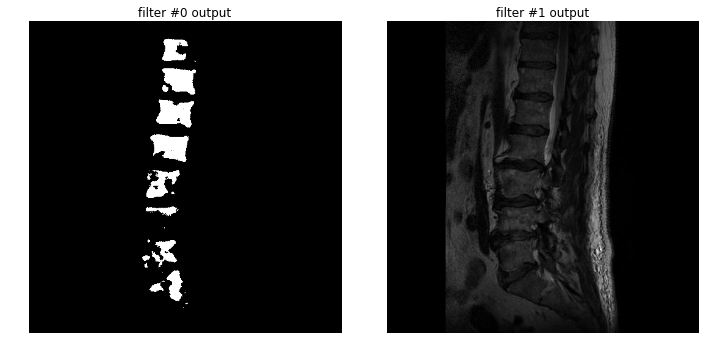

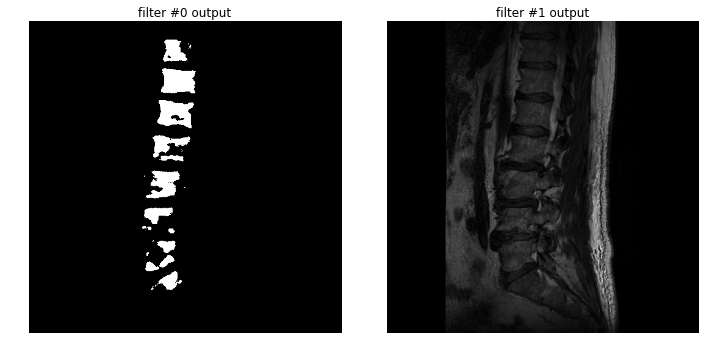

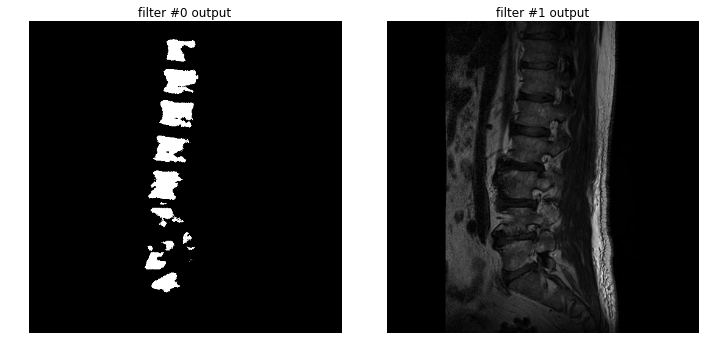

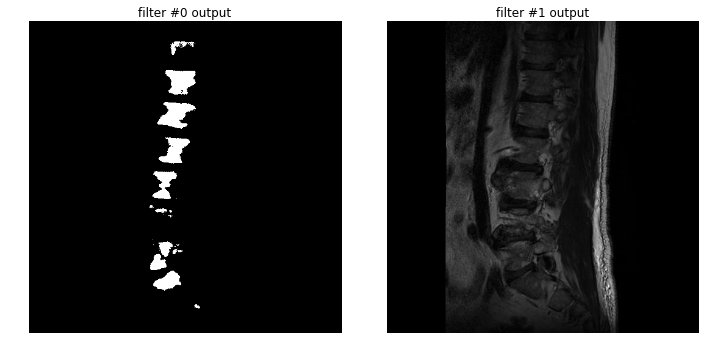

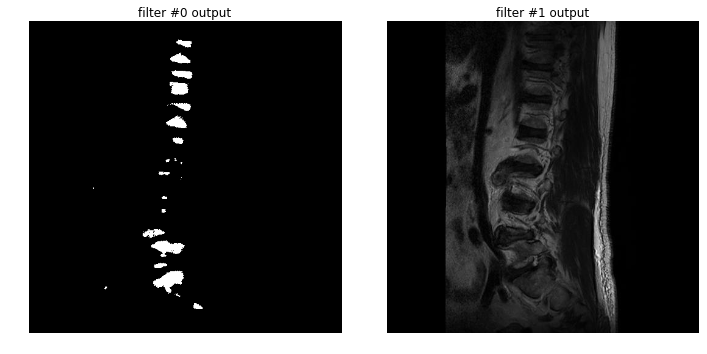

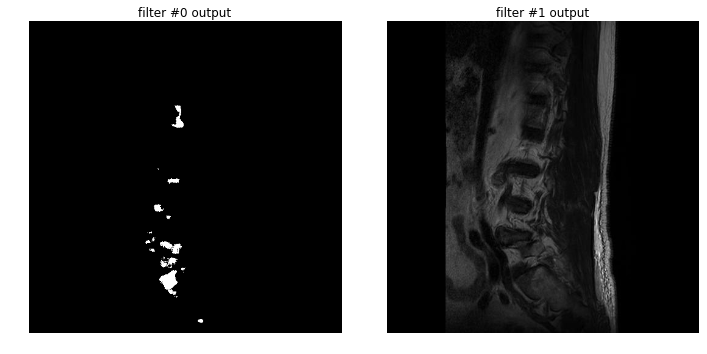

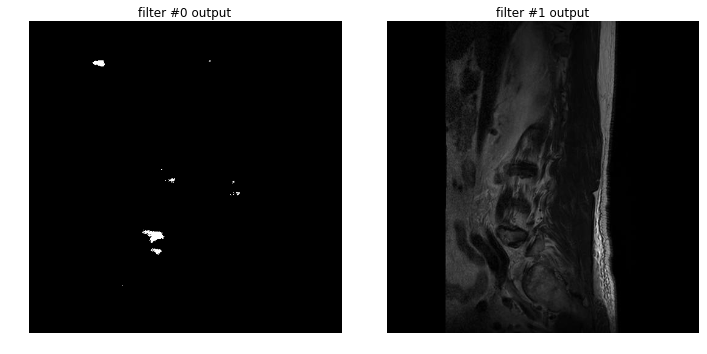

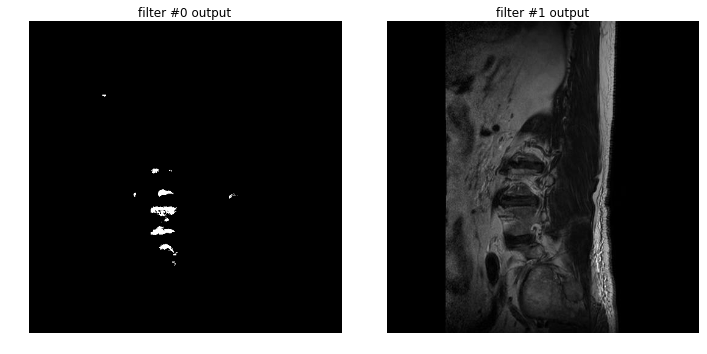

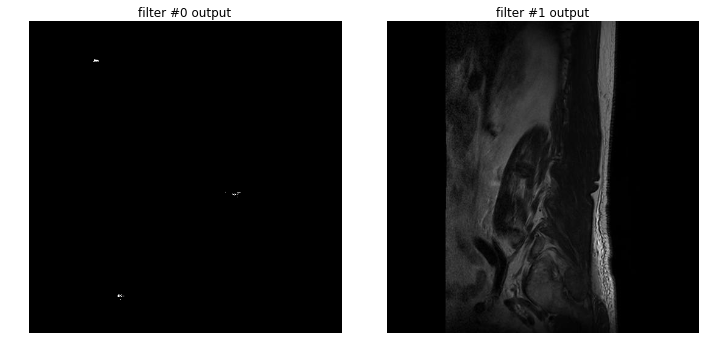

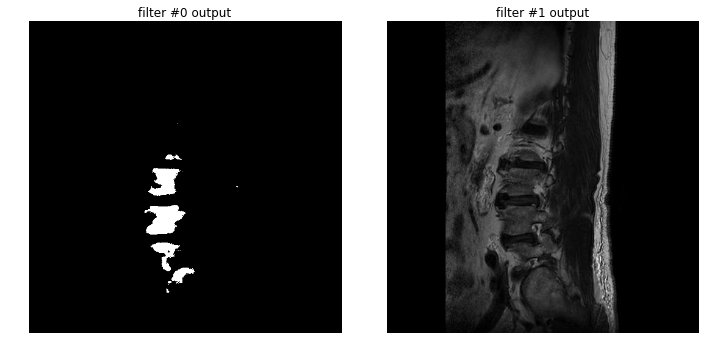

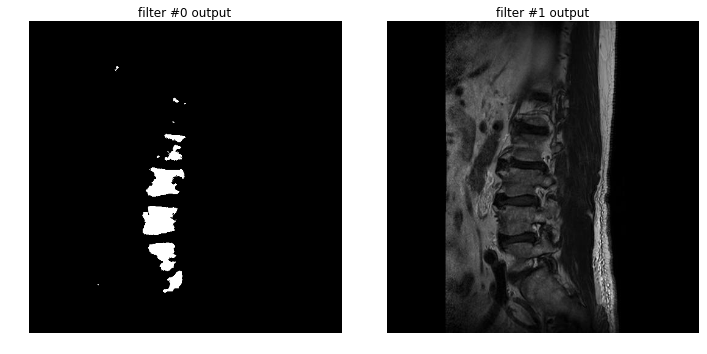

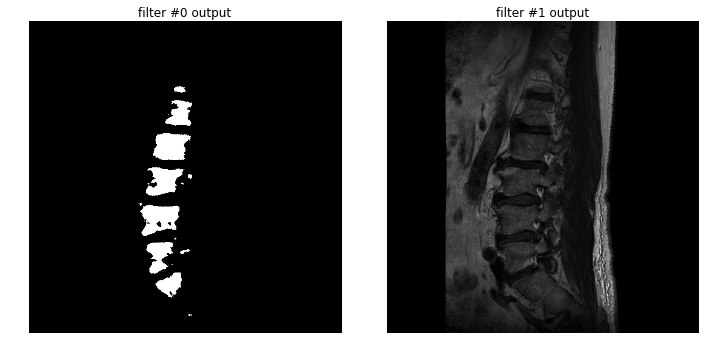

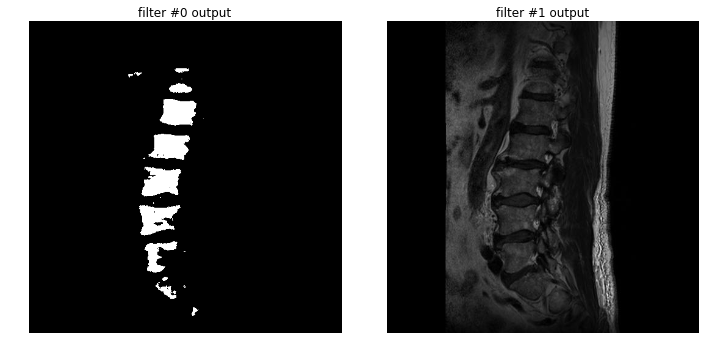

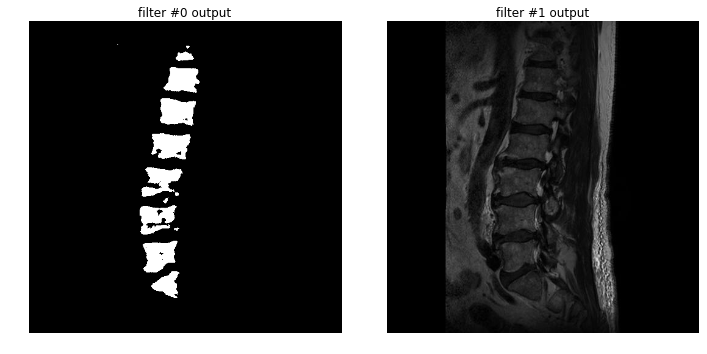

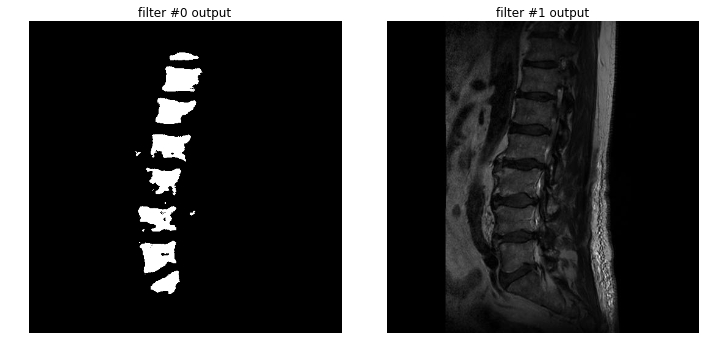

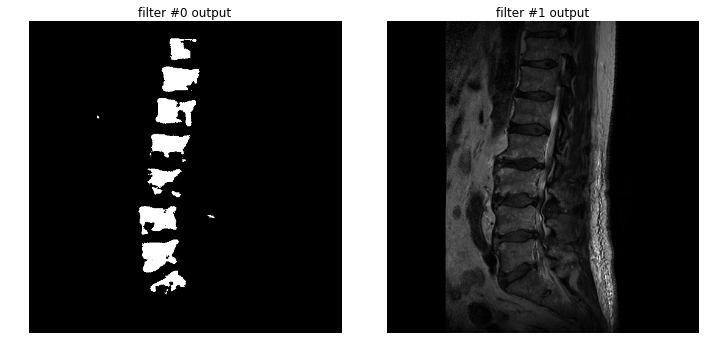

In [3]:
#ff = "/media/D/SpineDataset/spine_seg/image/AKa25.jpg"
dd = '/media/D/lisa_mri_test/*.jpg'
dd = '/media/D/SpineDataset/spine_seg/test/*.jpg'
import glob
ll = glob.glob(dd)
for ff in ll:
    ori = read_img_raw(ff)
    feed = read_image(ff)
    pred = sess.run(prediction,feed_dict = {data: feed})
    pred = pred.reshape(512,512)
    show_image(pred,ori)
